In [1]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lectura de Archivos y Carga de Datos

In [2]:
folders = ('01-10-19_PT5M','02-10-19_PT5M','05-10-19_PT5M','08-10-19_PT5M')
assets = pd.read_csv('southcentral-asset.csv',sep=';')
assets.sample(5)

,ResourceGruop,Name,Nodes,Size,Tier,File
45,WebFlowersSB,WebFlowersSB,2,Standard_A1_v2,Standard,WebFlowersSBresults.json
31,WebFlowersLM,WebFlowersLM,2,Standard_A1_v2,Standard,WebFlowersLMresults.json
26,WebFlowersJP,WebFlowersJP,2,Standard_A1_v2,Standard,WebFlowersJPresults.json
27,WebFlowersJQ,WebFlowersJQ,2,Standard_A1_v2,Standard,WebFlowersJQresults.json
34,WebFlowersMG,WebFlowersMG,1,Standard_A1_v2,Standard,WebFlowersMGresults.json


Recorrer el inventario y cargarlos datos en los arreglos respectivos

In [3]:
datosCPU={}
datosNTI={}
datosNTO={}

for i,r in assets.iterrows():
    print(r.Name)
    ultimoMin = 0
    for j in np.arange(0,len(folders)):
        with open(folders[j]+'/'+r.File, 'r') as f:
            datastore = json.load(f)
            print('File readed:'+folders[j]+'/'+r.File)
        tempCPU = pd.DataFrame(datastore["value"][0]["metricValues"])
        tempNTI = pd.DataFrame(datastore["value"][1]["metricValues"])
        tempNTO = pd.DataFrame(datastore["value"][2]["metricValues"])
        tempMin = np.arange(ultimoMin,ultimoMin+(tempCPU.shape[0]*5),step=5)
        tempCPU['minute'] = tempMin
        tempNTI['minute'] = tempMin
        tempNTO['minute'] = tempMin
        ultimoMin = tempMin[len(tempMin)-1]+5
        print(ultimoMin)
        tempCPU = tempCPU.dropna(axis=0,how='any')
        tempNTI = tempNTI.dropna(axis=0,how='any')
        tempNTO = tempNTO.dropna(axis=0,how='any')
        if r.Name in datosCPU:
            datosCPU[r.Name] = datosCPU[r.Name].append(tempCPU)
            datosNTI[r.Name] = datosNTI[r.Name].append(tempNTI)
            datosNTO[r.Name] = datosNTO[r.Name].append(tempNTO)
        else:
            datosCPU[r.Name] = tempCPU
            datosNTI[r.Name] = tempNTI
            datosNTO[r.Name] = tempNTO

WebFlowersPA
File readed:01-10-19_PT5M/WebFlowersPAresults.json
540
File readed:02-10-19_PT5M/WebFlowersPAresults.json
4860
File readed:05-10-19_PT5M/WebFlowersPAresults.json
9180
File readed:08-10-19_PT5M/WebFlowersPAresults.json
13500
WebflowersIC
File readed:01-10-19_PT5M/WebflowersICresults.json
540
File readed:02-10-19_PT5M/WebflowersICresults.json
4860
File readed:05-10-19_PT5M/WebflowersICresults.json
9180
File readed:08-10-19_PT5M/WebflowersICresults.json
13500
WebFlowersAL
File readed:01-10-19_PT5M/WebFlowersALresults.json
540
File readed:02-10-19_PT5M/WebFlowersALresults.json
4860
File readed:05-10-19_PT5M/WebFlowersALresults.json
9180
File readed:08-10-19_PT5M/WebFlowersALresults.json
13500
WebFlowersBGSales
File readed:01-10-19_PT5M/WebFlowersBGSalesresults.json
540
File readed:02-10-19_PT5M/WebFlowersBGSalesresults.json
4860
File readed:05-10-19_PT5M/WebFlowersBGSalesresults.json
9180
File readed:08-10-19_PT5M/WebFlowersBGSalesresults.json
13500
WebFlowersBQC
File readed:0

In [4]:
tempCPU_1 = datosCPU['WebFlowersMG']
tempCPU_2 = datosCPU['WebFlowersCA']

## CPU vs Tiempo en Máximos, Promedios, Mínimos y Acumulados cada 5 Minutos

Text(0.5, 0, 'Minutos')

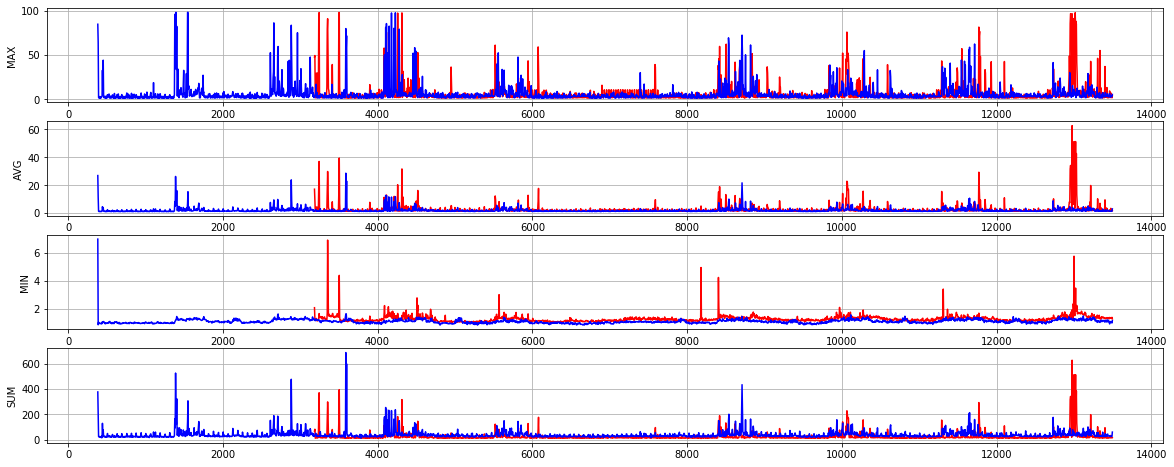

In [6]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,8))
ax1.set_ylabel('MAX')
ax1.plot(tempCPU_1['minute'], tempCPU_1['maximum'], color = 'red', label='CPU1')
ax1.plot(tempCPU_2['minute'], tempCPU_2['maximum'], color = 'blue', label='CPU2')
ax1.grid(True)
ax2.set_ylabel('AVG')
ax2.plot(tempCPU_1['minute'], tempCPU_1['average'], color = 'red', label='CPU1')
ax2.plot(tempCPU_2['minute'], tempCPU_2['average'], color = 'blue', label='CPU2')
ax2.grid(True)
ax3.set_ylabel('MIN')
ax3.plot(tempCPU_1['minute'], tempCPU_1['minimum'], color = 'red', label='CPU1')
ax3.plot(tempCPU_2['minute'], tempCPU_2['minimum'], color = 'blue', label='CPU2')
ax3.grid(True)
ax4.set_ylabel('SUM')
ax4.plot(tempCPU_1['minute'], tempCPU_1['total'], color = 'red', label='CPU1')
ax4.plot(tempCPU_2['minute'], tempCPU_2['total'], color = 'blue', label='CPU2')
ax4.grid(True)
ax3.set_xlabel('Minutos')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b41b1d7088>,
 'caps': [<matplotlib.lines.Line2D at 0x1b41b1f0ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b41b19ca08>,
 'medians': [<matplotlib.lines.Line2D at 0x1b41b1f0f88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b41b1f08c8>,
 'means': []}

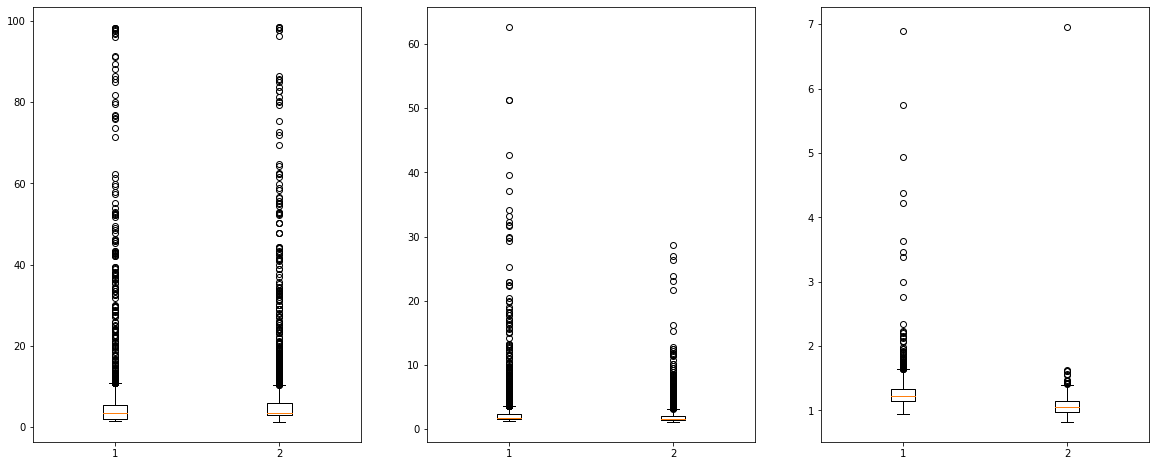

In [7]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
ax1.boxplot([tempCPU_1['maximum'],tempCPU_2['maximum']])
ax2.boxplot([tempCPU_1['average'],tempCPU_2['average']])
ax3.boxplot([tempCPU_1['minimum'],tempCPU_2['minimum']])

## Entrada de RED vs Tiempo en Máximos, Promedios y Mínimos cada 5 Minutos

In [8]:
tempNTI_1 = datosNTI['WebFlowersLM']
tempNTI_2 = datosNTI['WebFlowersCA']

Text(0.5, 0, 'Minutos')

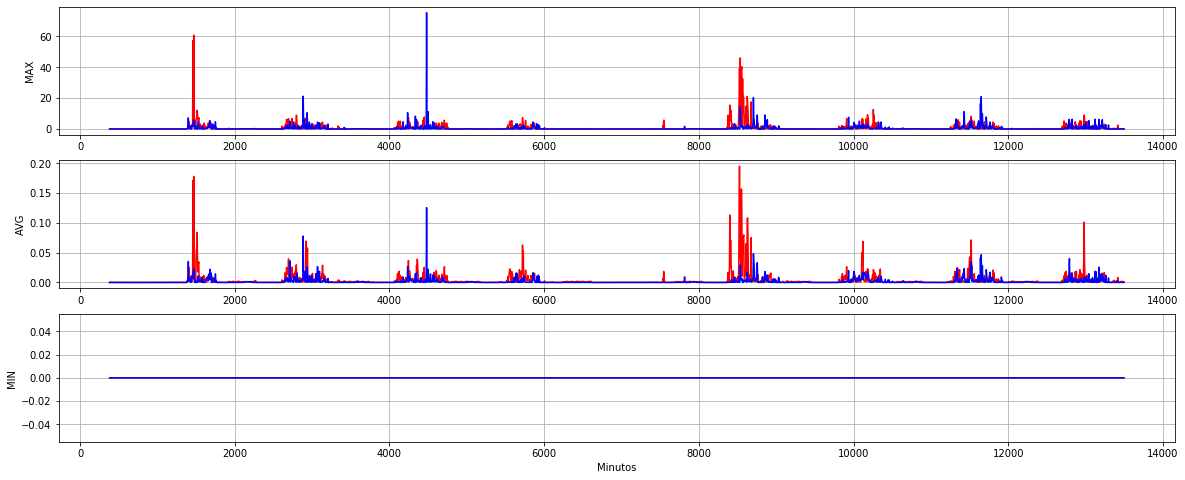

In [9]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,8))
ax1.set_ylabel('MAX')
ax1.plot(tempNTI_1['minute'], tempNTI_1['maximum']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax1.plot(tempNTI_2['minute'], tempNTI_2['maximum']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax1.grid(True)
ax2.set_ylabel('AVG')
ax2.plot(tempNTI_1['minute'], tempNTI_1['average']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax2.plot(tempNTI_2['minute'], tempNTI_2['average']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax2.grid(True)
ax3.set_ylabel('MIN')
ax3.plot(tempNTI_1['minute'], tempNTI_1['minimum']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax3.plot(tempNTI_2['minute'], tempNTI_2['minimum']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax3.grid(True)
ax3.set_xlabel('Minutos')

## Salida de RED vs Tiempo en Máximos, Promedios y Mínimos cada 5 Minutos

In [14]:
tempNTO_1 = datosNTO['WebFlowersLM']
tempNTO_2 = datosNTO['WebFlowersCA']

Text(0.5, 0, 'Minutos')

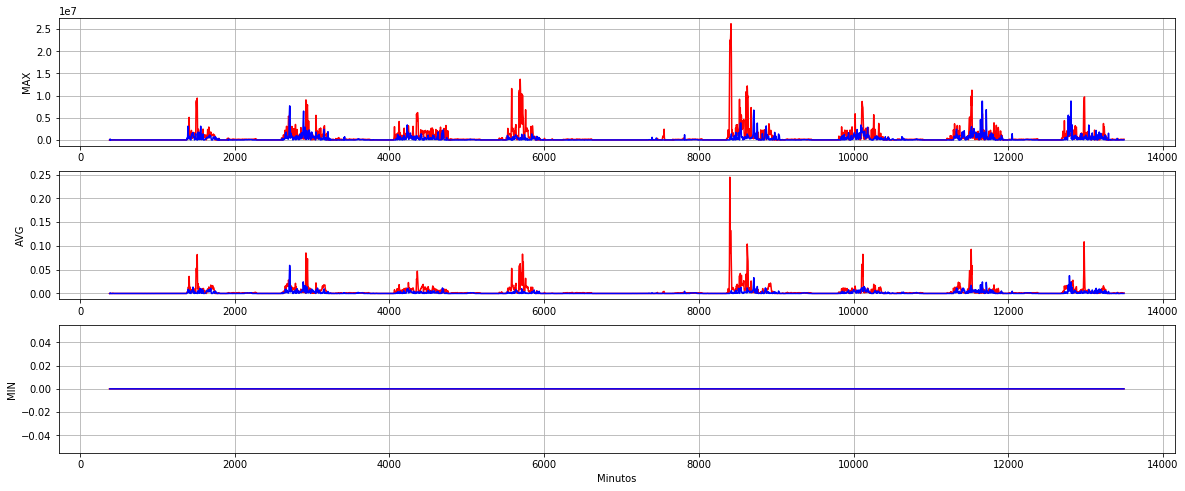

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,8))
ax1.set_ylabel('MAX')
ax1.plot(tempNTO_1['minute'], tempNTO_1['maximum'], color = 'red', label='CPU1')
ax1.plot(tempNTO_2['minute'], tempNTO_2['maximum'], color = 'blue', label='CPU2')
ax1.grid(True)
ax2.set_ylabel('AVG')
ax2.plot(tempNTO_1['minute'], tempNTO_1['average']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax2.plot(tempNTO_2['minute'], tempNTO_2['average']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax2.grid(True)
ax3.set_ylabel('MIN')
ax3.plot(tempNTO_1['minute'], tempNTO_1['minimum']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax3.plot(tempNTO_2['minute'], tempNTO_2['minimum']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax3.grid(True)
ax3.set_xlabel('Minutos')

## Pruebas de Normalidad